In [1]:
import numpy as np
import pandas as pd
from IPython.core.display import display

pd.set_option('display.max_columns', None)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
import warnings
import classifier_utils
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
non_features_columns = ["chunk_id", "line_start", "line_end", "line_separator", "kind_conflict", "url", "project"]
non_features_columns.extend(["project_user", "project_name", "path", "file_name", "sha", "leftsha", "rightsha", "basesha"])

In [3]:
selected_dataset = pd.read_csv("../../data/SELECTED_LABELLED_DATASET.csv")
projects = list(selected_dataset['project'].unique())

In [4]:
project_name = "alexo/wro4j"
project_name = project_name.replace('/','__')
df_training = pd.read_csv(f'../../data/projects/{project_name}-training.csv')

In [5]:
df_na = df_training[df_training.isna().any(axis=1)]
print(f'Total number of rows for project {project_name}: {len(df_training)}')
print(f'Percentage of rows with missing values: {len(df_na)}/{len(df_training)} ({(len(df_na) / len(df_training))*100:.2f}%)')

Total number of rows for project alexo__wro4j: 1663
Percentage of rows with missing values: 295/1663 (17.74%)


# Class distributions

### Normalized (%)

In [6]:
class_distribution_normalized = classifier_utils.get_project_class_distribution(project_name)

class_distribution_normalized

,Project,Version 1,Version 2,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None
0,alexo__wro4j,30.7,14.77,28.65,0.88,1.02,23.61,0.37


### Count

In [7]:
class_distribution_count = classifier_utils.get_project_class_distribution(project_name, False)

class_distribution_count

,Project,Version 1,Version 2,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None
0,alexo__wro4j,420,202,392,12,14,323,5


# Classifiers

In [8]:
# choose which algorithm to use
# algorithm = DecisionTreeClassifier(min_samples_split=5, random_state=99)
algorithm = RandomForestClassifier(random_state=99)
# algorithm = XGBRFClassifier(random_state=99)

In [9]:
result = classifier_utils.ProjectsResults(algorithm, [project_name], non_features_columns)

In [10]:
report = result.get_report_df()
report

,project,observations,observations (wt NaN),precision,recall,f1-score,accuracy,baseline (majority),improvement
0,alexo__wro4j,1663,1368,0.569,0.581,0.572,0.581,0.307,0.396


### Inspect project

In [11]:
sample_project = result.get_project(project_name)

,precision,recall,f1-score,support
Combination,0.588764,0.668367,0.626045,392.00000
ConcatenationV1V2,0.000000,0.000000,0.000000,12.00000
ConcatenationV2V1,0.333333,0.142857,0.200000,14.00000
Manual,0.552189,0.507740,0.529032,323.00000
None,0.000000,0.000000,0.000000,5.00000
Version 1,0.614894,0.688095,0.649438,420.00000
Version 2,0.527027,0.386139,0.445714,202.00000
accuracy,0.581140,0.581140,0.581140,0.58114
macro avg,0.373744,0.341885,0.350033,1368.00000
weighted avg,0.569104,0.581140,0.571554,1368.00000


None

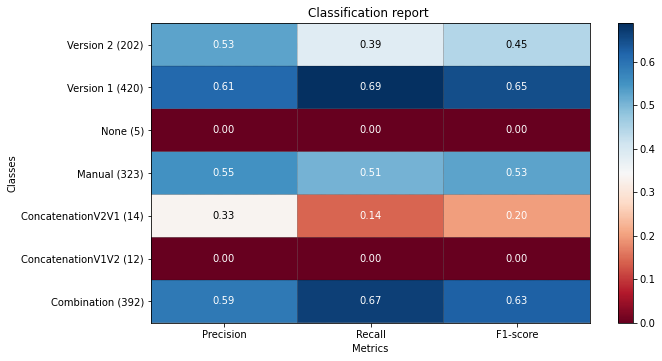

In [12]:
display(sample_project.get_scores_df())
display(classifier_utils.plot_classification_report(sample_project.scores))

### Confusion matrix

In [13]:
display(sample_project.get_confusion_matrix_df())

Columns = predicted label
Rows = true label


,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None,Version 1,Version 2
Combination,262,1,2,50,0,62,15
ConcatenationV1V2,8,0,1,1,0,1,1
ConcatenationV2V1,5,0,2,1,1,4,1
Manual,80,0,0,164,0,57,22
None,2,0,1,0,0,0,2
Version 1,57,0,0,45,0,289,29
Version 2,31,0,0,36,0,57,78
